<a href="https://colab.research.google.com/github/Exper626/Census-Income-ML/blob/main/tropospheric_formaldehyde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necessary Imports

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=998c89e8b9b6025cfce8a0f71f133ebfe7245a333084f01807cc49e5a6b86b43
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

Start a SparkSession

In [4]:
spark = SparkSession.builder.appName("Formaldehyde").getOrCreate()

Load the data

In [5]:
cmb_nuw_mat = spark.read.csv("/content/col_mat_nuw_output.csv", inferSchema=True)
kandy = spark.read.csv("/content/kan_output.csv", inferSchema=True)
jaf_kur_mon = spark.read.csv("/content/mon_kur_jaf_output.csv", inferSchema=True)

# Exploratory data analysis and Data Pre-processing

In [6]:
data_frames = [("Colombo, Deniyaya, Matara, Nuwara Eliya", cmb_nuw_mat), ("Kandy", kandy), ("Bibile, Monaragala, Kurunegala, Jaffna", jaf_kur_mon)]

first rows of the dataframe

In [7]:
for name, df in data_frames:
    print("City:", name)
    df.show()

City: Colombo, Deniyaya, Matara, Nuwara Eliya
+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                NULL|Colombo Proper|2019-01-13|2019-0

Meta data

In [8]:
for name, df in data_frames:
  print("City: ", name)
  df.printSchema()

City:  Colombo, Deniyaya, Matara, Nuwara Eliya
root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)

City:  Kandy
root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)

City:  Bibile, Monaragala, Kurunegala, Jaffna
root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



check the number of rows

In [9]:
for name, df in data_frames:
    count = df.count()
    print(f"City: {name}, Rows: {count}")

City: Colombo, Deniyaya, Matara, Nuwara Eliya, Rows: 5478
City: Kandy, Rows: 1826
City: Bibile, Monaragala, Kurunegala, Jaffna, Rows: 5478


combine all of them into one

In [10]:
sl_hcho = cmb_nuw_mat.union(kandy).union(jaf_kur_mon)

In [11]:
sl_hcho = sl_hcho.withColumnRenamed("_c0", "HCHO_reading").withColumnRenamed("_c1", "Location").withColumnRenamed("_c2", "Current_date").withColumnRenamed("_c3", "Next_date")

In [12]:
sl_hcho.show()

+--------------------+--------------+------------+----------+
|        HCHO_reading|      Location|Current_date| Next_date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [13]:
sl_hcho.count()

12782

check the number of rows via location

In [14]:
sl_hcho.groupBy("Location").count().show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara| 1826|
|     Colombo Proper| 1826|
|Nuwara Eliya Proper| 1826|
|       Kandy Proper| 1826|
|  Kurunegala Proper| 1826|
| Bibile, Monaragala| 1826|
|      Jaffna Proper| 1826|
+-------------------+-----+



check for null values in cities

In [15]:
city_null = sl_hcho.filter(col("Location").isNull()).count()
print("NULL values in 'Location':", city_null)

NULL values in 'Location': 0


check for the null values in the HCHO reading

In [16]:
check_null = sl_hcho.filter(col("HCHO_reading").isNull()).count()
print("NULL values in 'HCHO_reading':", check_null)

NULL values in 'HCHO_reading': 4864


check null values for each city

In [17]:
null_city = sl_hcho.filter(col("HCHO_reading").isNull()).groupBy("Location").count()
null_city.show()

+-------------------+-----+
|           Location|count|
+-------------------+-----+
|   Deniyaya, Matara|  847|
|     Colombo Proper|  487|
|Nuwara Eliya Proper| 1085|
|       Kandy Proper|  793|
|  Kurunegala Proper|  592|
| Bibile, Monaragala|  695|
|      Jaffna Proper|  365|
+-------------------+-----+



check for dates with errors

In [18]:
date_error = sl_hcho.filter(col("Current_date").isNull() & col("Next_date").isNull())
date_error.show()

+------------+--------+------------+---------+
|HCHO_reading|Location|Current_date|Next_date|
+------------+--------+------------+---------+
+------------+--------+------------+---------+



In [19]:
sl_hcho.printSchema()

root
 |-- HCHO_reading: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- Current_date: date (nullable = true)
 |-- Next_date: date (nullable = true)



In [20]:
# Columns to check for format inconsistencies
columns_to_check = ["Current_date", "Next_date"]

# Iterate over each column
for column in columns_to_check:
    # Convert the column to a string format
    sl_hcho = sl_hcho.withColumn(f"{column}_str", col(column).cast("string"))

    # Check for variations in the string format of dates
    format_inconsistencies = sl_hcho.groupBy(f"{column}_str").count().orderBy(f"{column}_str")

    # Show the format inconsistencies
    print(f"Format inconsistencies in {column}:")
    format_inconsistencies.show(truncate=False)


Format inconsistencies in Current_date:
+----------------+-----+
|Current_date_str|count|
+----------------+-----+
|2019-01-01      |7    |
|2019-01-02      |7    |
|2019-01-03      |7    |
|2019-01-04      |7    |
|2019-01-05      |7    |
|2019-01-06      |7    |
|2019-01-07      |7    |
|2019-01-08      |7    |
|2019-01-09      |7    |
|2019-01-10      |7    |
|2019-01-11      |7    |
|2019-01-12      |7    |
|2019-01-13      |7    |
|2019-01-14      |7    |
|2019-01-15      |7    |
|2019-01-16      |7    |
|2019-01-17      |7    |
|2019-01-18      |7    |
|2019-01-19      |7    |
|2019-01-20      |7    |
+----------------+-----+
only showing top 20 rows

Format inconsistencies in Next_date:
+-------------+-----+
|Next_date_str|count|
+-------------+-----+
|2019-01-02   |7    |
|2019-01-03   |7    |
|2019-01-04   |7    |
|2019-01-05   |7    |
|2019-01-06   |7    |
|2019-01-07   |7    |
|2019-01-08   |7    |
|2019-01-09   |7    |
|2019-01-10   |7    |
|2019-01-11   |7    |
|2019-01-12

Imports to use pandas and plots

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

spark to pandas

In [22]:
hcho_fill = sl_hcho.toPandas()

Linear Interpolation and convert back

In [36]:
hcho_filled = hcho_fill.interpolate(method="linear")

In [40]:
sl_hcho = spark.createDataFrame(pd.DataFrame(hcho_filled))

In [24]:
sl_hcho.show()

+--------------------+--------------+------------+----------+----------------+-------------+
|        HCHO_reading|      Location|Current_date| Next_date|Current_date_str|Next_date_str|
+--------------------+--------------+------------+----------+----------------+-------------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|      2019-01-01|   2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|      2019-01-02|   2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|      2019-01-03|   2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|      2019-01-04|   2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|      2019-01-05|   2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|      2019-01-06|   2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|      2019-01-07|   2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|      201

outlier detection and handling

In [25]:
def outlier_detection(dataframe, column, factor=1.5):
    # Calculate quartiles and IQR
    Q1 = dataframe.approxQuantile(column, [0.25], 0.01)[0]
    Q3 = dataframe.approxQuantile(column, [0.75], 0.01)[0]
    IQR = Q3 - Q1

    # Define lower and upper whiskers
    lower_whisker = Q1 - factor * IQR
    upper_whisker = Q3 + factor * IQR

    # Identify outliers
    outliers = dataframe.filter((col(column) < lower_whisker) | (col(column) > upper_whisker))

    return outliers

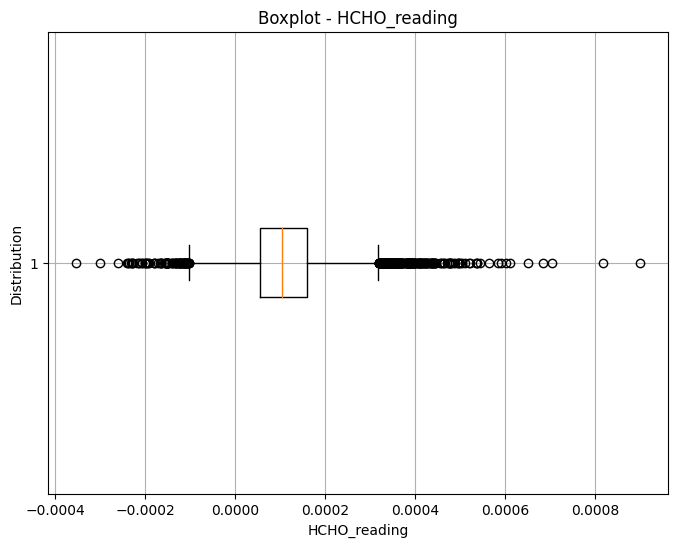

In [26]:
hcho_reading = sl_hcho.toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(hcho_reading["HCHO_reading"], vert=False)
plt.title('Boxplot - HCHO_reading')
plt.xlabel('HCHO_reading')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

In [27]:
# Detect outliers in the HCHO readings column
outliers_hcho = outlier_detection(sl_hcho, 'HCHO_reading')
print("The number of outliers in HCHO reading column :", outliers_hcho.count())
print("The number of rows in the dataframe :", sl_hcho.count())

The number of outliers in HCHO reading column : 358
The number of rows in the dataframe : 12782


In [28]:
sl_hcho = sl_hcho.subtract(outliers_hcho)
print("The number of rows in the dataframe :", sl_hcho.count())

The number of rows in the dataframe : 12424


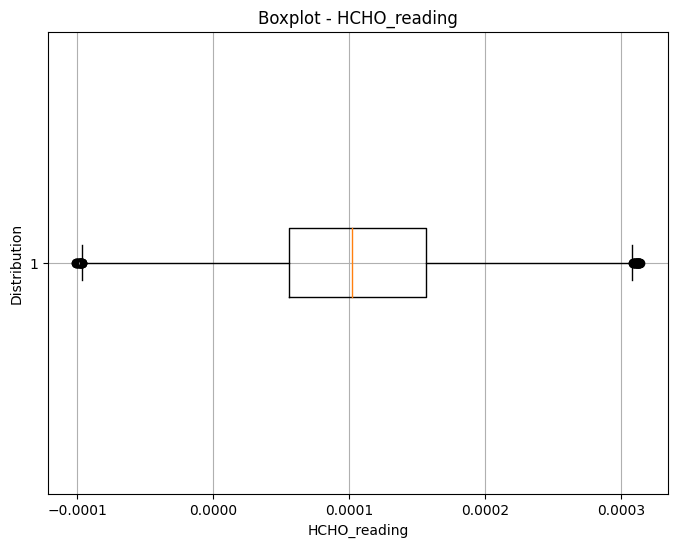

In [29]:
hcho_reading_data = sl_hcho.toPandas()

plt.figure(figsize=(8, 6))
plt.boxplot(hcho_reading_data.HCHO_reading, vert=False)
plt.title('Boxplot - HCHO_reading')
plt.xlabel('HCHO_reading')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

Summarize the dataset

In [30]:
sl_hcho.groupBy('Location').agg(
    mean('HCHO_reading').alias('mean(HCHO_reading)'),
    median('HCHO_reading'),
    stddev('HCHO_reading')).show()

+-------------------+--------------------+--------------------+--------------------+
|           Location|  mean(HCHO_reading)|median(HCHO_reading)|stddev(HCHO_reading)|
+-------------------+--------------------+--------------------+--------------------+
|       Kandy Proper|9.834225722654409E-5|9.537965694244273E-5|7.482898630043512E-5|
|   Deniyaya, Matara|8.774566217386048E-5|8.076289701838124E-5|7.278292783141768E-5|
|  Kurunegala Proper|1.198328428369900...|1.132276678815462...|7.311285886861345E-5|
| Bibile, Monaragala|1.163701369232310...| 1.14978897194216E-4|7.714504907578183E-5|
|     Colombo Proper| 1.42281663280467E-4|1.383807546722804...| 7.81908232463991E-5|
|Nuwara Eliya Proper|8.238239821646162E-5|7.624938460239996E-5|6.987607427439773E-5|
|      Jaffna Proper|1.040500140572642...|  9.8657740674029E-5|6.358254396117346E-5|
+-------------------+--------------------+--------------------+--------------------+



In [31]:
sl_hcho.agg(
    mean('HCHO_reading').alias('mean(HCHO_reading)'),
    median('HCHO_reading'),
    stddev('HCHO_reading')).show()

+--------------------+--------------------+--------------------+
|  mean(HCHO_reading)|median(HCHO_reading)|stddev(HCHO_reading)|
+--------------------+--------------------+--------------------+
|1.070609391628324...|1.021184410050649...|7.531763527734947E-5|
+--------------------+--------------------+--------------------+



In [32]:
pd_sl_hcho = sl_hcho.toPandas()

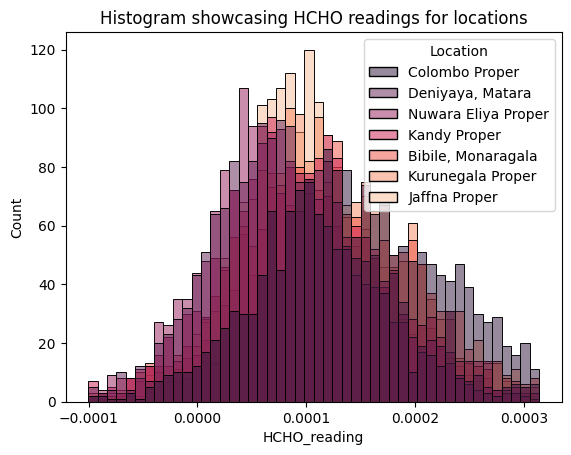

In [33]:
sns.histplot(x='HCHO_reading', palette='rocket', hue='Location', data=pd_sl_hcho)
plt.title("Histogram showcasing HCHO readings for locations")
plt.show()

<ipython-input-34-9b5cd5747674>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HCHO_reading', palette='rocket', y='Location', data=pd_sl_hcho)


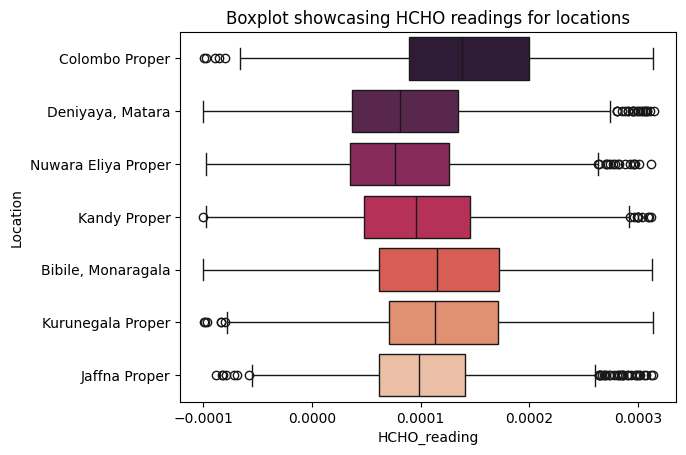

In [34]:
sns.boxplot(x='HCHO_reading', palette='rocket', y='Location', data=pd_sl_hcho)
plt.title("Boxplot showcasing HCHO readings for locations")
plt.show()

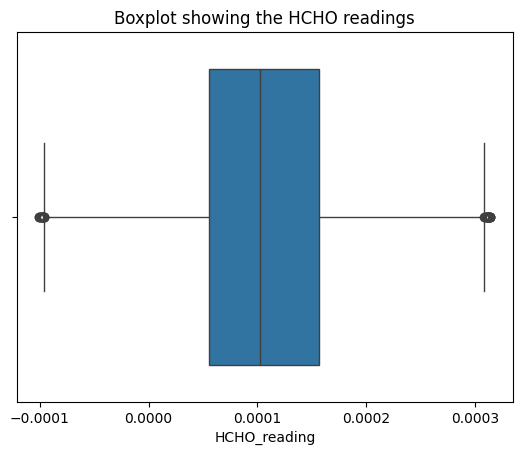

In [35]:
sns.boxplot(x='HCHO_reading', data=pd_sl_hcho)
plt.title('Boxplot showing the HCHO readings')
plt.show()